<a href="https://colab.research.google.com/github/SeoyoungOhMe/skt-fly-ai-challenger-class/blob/master/05_nn_multi_fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [2]:
from keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

4422102/4422102 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [3]:
y_train[:20]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5, 0, 9, 5, 5, 7, 9, 1, 0, 6, 4],
      dtype=uint8)

In [4]:
pd.Series(y_train).value_counts().sort_index()

0    6000
1    6000
2    6000
3    6000
4    6000
5    6000
6    6000
7    6000
8    6000
9    6000
dtype: int64

In [5]:
samples = np.random.randint(60000, size=16)
samples

array([42346, 44290, 21983, 35686, 55400, 13954, 14791, 51180, 15252,
       43530, 11427,  2304, 27654,  2856, 20736, 49761])

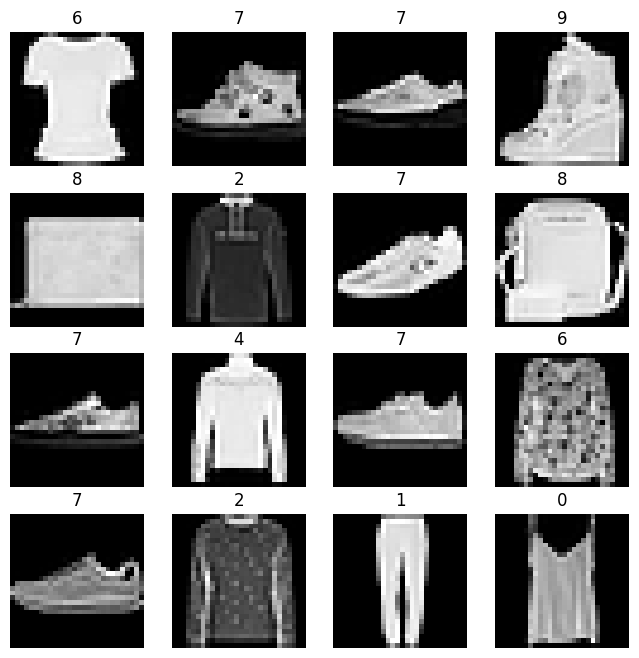

In [6]:
plt.figure(figsize=(8, 8))
for i, idx in enumerate(samples):
  plt.subplot(4, 4, 1+i)
  plt.imshow(X_train[idx], cmap='gray')
  plt.axis('off')
  plt.title(y_train[idx])
plt.show()

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

X_train.shape, X_val.shape, y_train.shape, y_val.shape

((48000, 28, 28), (12000, 28, 28), (48000,), (12000,))

In [8]:
X_train_s = X_train.astype('float32')/255.
X_val_s = X_val.astype('float32')/255.

In [9]:
np.max(X_train_s), np.min(X_train_s)

(1.0, 0.0)

In [10]:
from keras.utils import to_categorical

y_train_o = to_categorical(y_train)
y_val_o = to_categorical(y_val)


y_train_o[:5]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

In [11]:
X_train_s = X_train_s.reshape(-1, 28*28)
X_val_s = X_val_s.reshape(-1, 28*28)

In [12]:
from keras import layers

model = keras.Sequential([
    layers.Dense(units=64, activation='relu', input_shape=(28*28, )),
    layers.Dense(units=32, activation='relu'),
    layers.Dense(units=10, activation='softmax')
])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 52650 (205.66 KB)
Trainable params: 52650 (205.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [14]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [15]:
X_train_s.shape

(48000, 784)

In [37]:
EPOCHS=10
BATCH_SIZE=32

history = model.fit(
    X_train_s, y_train_o,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    validation_data=(X_val_s, y_val_o),
    verbose=1
)

Epoch 1/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.1451 - accuracy: 0.9437 - val_loss: 0.4014 - val_accuracy: 0.8882
Epoch 2/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1488 - accuracy: 0.9427 - val_loss: 0.3925 - val_accuracy: 0.8875
Epoch 3/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1448 - accuracy: 0.9453 - val_loss: 0.4020 - val_accuracy: 0.8911
Epoch 4/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1432 - accuracy: 0.9456 - val_loss: 0.4167 - val_accuracy: 0.8867
Epoch 5/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1438 - accuracy: 0.9446 - val_loss: 0.4187 - val_accuracy: 0.8883
Epoch 6/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1391 - accuracy: 0.9466 - val_loss: 0.4637 - val_accuracy: 0.8758
Epoch 7/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1363 - accuracy: 0.9481 - val_loss: 0.4298 - val_accuracy:

In [38]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure(figsize=(16, 8))
    plt.subplot(1,2,1)
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.plot(hist['epoch'], hist['loss'], label='train loss')
    plt.plot(hist['epoch'], hist['val_loss'], label='val loss')
    plt.legend()

    plt.subplot(1,2,2)
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.plot(hist['epoch'], hist['accuracy'], label='train accuracy')
    plt.plot(hist['epoch'], hist['val_accuracy'], label='val accuracy')
    plt.legend()
    plt.show()

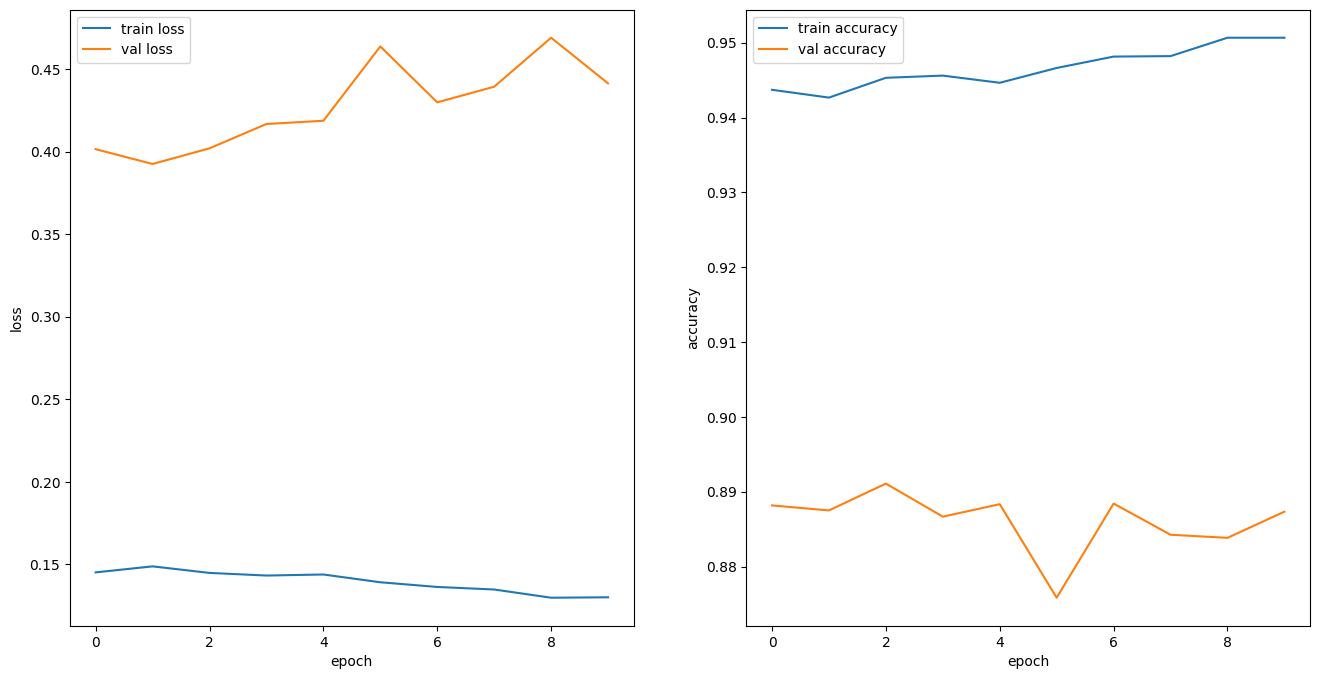

In [39]:
plot_history(history)

In [19]:
X_test_s = X_test.astype('float32')/255.
X_test_s = X_test_s.reshape(-1, 28*28)

y_test_o = to_categorical(y_test)

In [20]:
y_pred = model.predict(X_test_s)
y_pred[:5]

313/313 [==============================] - 1s 2ms/step


array([[1.84627424e-05, 1.19286048e-09, 3.36928042e-06, 4.54794508e-06,
        7.94820778e-07, 1.17809023e-03, 3.57679273e-05, 2.33240202e-01,
        1.84623896e-05, 7.65500307e-01],
       [1.13880596e-04, 7.88898831e-08, 9.98765111e-01, 1.48738832e-09,
        9.32581548e-04, 9.16566198e-11, 1.88285252e-04, 3.69606066e-13,
        9.10156714e-08, 1.25661526e-09],
       [2.13329645e-06, 9.99992430e-01, 7.64726281e-07, 3.47718583e-06,
        1.07562880e-06, 5.15244736e-10, 3.28704495e-08, 5.23042438e-13,
        4.99763009e-10, 5.22853816e-10],
       [9.90562565e-09, 9.99999344e-01, 2.20308962e-08, 5.05145465e-07,
        3.98176212e-08, 2.37456299e-09, 1.22035415e-09, 2.02509537e-12,
        4.39103164e-11, 4.52666266e-10],
       [3.84165496e-02, 1.62541568e-07, 3.00175697e-02, 5.27767697e-04,
        1.33880286e-03, 2.18261498e-08, 9.29594398e-01, 9.37327016e-08,
        1.04517996e-04, 7.67226140e-08]], dtype=float32)

In [21]:
y_pred = np.argmax(y_pred, axis=1)
y_pred[:20]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7, 4, 5, 7, 3, 4, 1, 2, 2, 8, 0])

In [22]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

def print_metrics(y_test, y_pred):
    print(f'accuracy : {accuracy_score(y_test, y_pred) }')
    print(f'recall : {recall_score(y_test, y_pred, average="macro") }')
    print(f'precision : {precision_score(y_test, y_pred, average="macro") }')
    print(f'f1 : {f1_score(y_test, y_pred, average="macro") }')

In [24]:
print_metrics(y_test, y_pred)

accuracy : 0.874
recall : 0.874
precision : 0.8761620576485128
f1 : 0.8745336438747626


In [26]:
samples = np.where(y_test != y_pred)[0]
samples = np.random.choice(samples, 9)
samples

array([8708,  760, 8227, 2351, 8618,  382, 2591, 6500,  563])

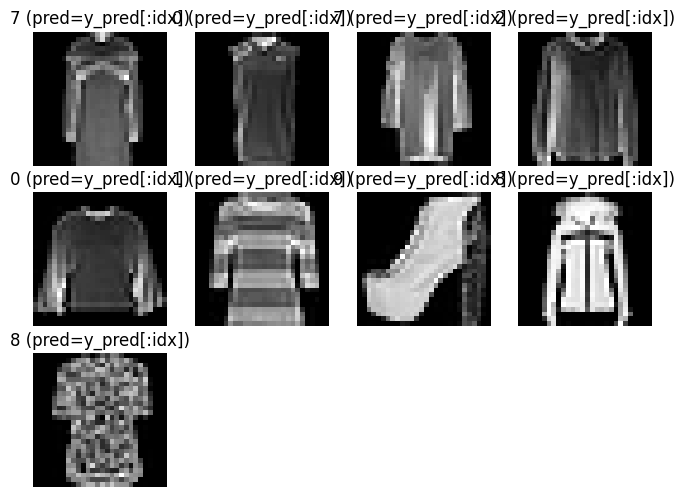

In [27]:
plt.figure(figsize=(8, 8))
for i, idx in enumerate(samples):
  plt.subplot(4, 4, 1+i)
  plt.imshow(X_test[idx], cmap='gray')
  plt.axis('off')
  plt.title(f'{y_train[idx]} (pred=y_pred[:idx])')
plt.show()